<a href="https://colab.research.google.com/github/zaraktariq/chicago-crash-data/blob/main/ChicagoCrashData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Pedestrian Traffic Accidents
### _by Zarak Tariq_
____________________________

**Introduction:** As of the 2020 US Census, the population of Chicago was 2,740,076 people.
Even though Chicago is a city with extensive public transit
(especially by American standards), many Chicagoans still depend on walking or driving to get around.
In the era of the CAFE
standards, one must wonder about the effects of large cars driving in proximity to pedestrians.
To provide insight into
this question, I propose to work on a combination of datasets,
with an aim to determine a correlation between the size of
vehicles and pedestrian hospitalization rates.
Subsequently, this data will be correlated with a map of speed cameras in
the city,
in an attempt to determine if there is a substantial correlation between those cameras and the accident rates in a
+/- &frac14; mile radius.
Ultimately I propose to shed light on the pedestrian landscape and its dangers.

**Dataset Description and Significance:** There are the datasets proposed for consideration:
1. [Red Light Camera Locations](https://data.cityofchicago.org/Transportation/Map-Red-Light-Camera-Locations/7mgr-iety)
2. [Traffic Crashes – Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/data_preview)
3. [Traffic Crashes – Vehicles](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/data_preview)
4. [Traffic Crashes – People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data)

The union of these datasets allows us to observe the effect of traffic crashes on the city population.
The Crashes dataset
displays details relating to every traffic incident that occurs within city limits.
We can then extract the make and model
of the car involved in the traffic incident from the Vehicles dataset.
Then we can take this information and bring it to the
People dataset.
In doing so, we can learn about the effect of the car's crash on the pedestrian.
One of the data fields in
the People dataset is the hospital they were sent to.
Using these three pieces of information, I hope to determine if there
is a correlation between the size of the vehicle involved and the odds of a grave injury being sustained.
Finally, we can
plot the accidents on the map of red light camera locations.
This will hopefully show us if there is a meaningful increase
in accidents in the vicinity of the cameras.

**Importance:** The narrative from this data analysis aims to see if there is a statistically significant correlation between
the size of a car and the damage it may impart to passersby. The study addresses the challenge of accommodating both walking
and driving in a city with narrow streets. By examining statistical connections, the goal is to discern whether larger cars
pose a significant risk to pedestrians, while automates are pushed to design larger cars. This exploration aims to
shed light on the delicate balance required for safe and sustainable urban mobility.

**Deliverables:** By the end of February, the deliverables for this project will include:
1. Connection to the API and a basic understanding of its use.
   I hope to be able to access the data in all 4 portals reliably.
   Further than that, I hope to be able to demonstrate a basic analysis of the data under consideration.

Further deliverables will include:
1. Comprehensive Data Analysis Report: This report will include an examination of the datasets described above. The aim will be to provide a statistical analysis, complete with a visual component to be determined later.
2. Data Visualization: This would allow regular users to view crashes, hopefully by location, car type, and severity.
3. Academic paper: This would allow for a more in-depth explanation of the findings in this project to those with decision-making ability.

**Resource and Assistance Requirements:** This project will be done using the Python-based tools ``pandas``, ``matplotlib.pyplot``, and JetBrains, ``Pycharm``. Access to data will be established via the Socrata API, supported by the Chicago Data Portal. There will also be a potential need to use the services of Google Maps. I will be using the help of the course instructor at length.

**Work Schedule:** Every week I intend to put 10 hours into the project.
At the conclusion of every hour, I will record questions and stumbling blocks,
with the aim of bringing these issues to the course instructor.
These 10 hours will primarily be used to write the code of the data mining and the analysis.
However, I am also aware that much of the time will be spent reading documentation,
course material, or other supplemental aid.

**In conclusion** this proposal aims to analyze Chicago pedestrian traffic accidents,
exploring correlations between vehicle size, pedestrian injuries, and the proximity of speed cameras.
The deliverables include a comprehensive data analysis report, data visualization tools, and an academic paper,
contributing valuable insights to urban safety.
Utilizing Python tools, Socrata API, and potential Google Maps integration, the project ensures a systematic approach.
The commitment to weekly hours, collaboration with the instructor,
and structured problem-solving underline the dedication to a rigorous and impactful analysis.

In [ ]:
!pip install sodapy

In [ ]:
# import modules
import pandas as pd
from sodapy import Socrata

# attempt an authenticated client
domain = "data.cityofchicago.org"

clientAuth = Socrata(domain,
                     "YA4Qqo2jgEauLCdtGL8DRSJuk",
                     "zaraktariq7@gmail.com",
                     "xC|[F8H/bmL^^B@$^'E<s4e$C7_t%G/@_Wb2LB,<")
crashes_results = clientAuth.get("85ca-t3if", limit=2000)
vehicles_results = clientAuth.get("68nd-jvt3", limit=2000)
people_results = clientAuth.get("u6pd-qa9d", limit=2000)

# load datasets into dataframes
#crashes_master = pd.DataFrame.from_records(crashes_results)
#working_crashes = crashes_master.copy(deep=True)

vehicles_master = pd.DataFrame.from_records(vehicles_results)
working_vehicles = vehicles_master.copy(deep=True)

people_master = pd.DataFrame.from_records(people_results)
working_people = people_master.copy(deep=True)

In [ ]:
#print("crashes")
#for column in range(working_crashes.shape[1]):
#    print(working_crashes[working_crashes.columns[column]].count())
print("vehicles")
for column in range(working_vehicles.shape[1]):
    print(working_vehicles[working_vehicles.columns[column]].count())
#print("people:")
#for column in range(working_people.shape[1]):
#    print(working_people[working_people.columns[column]].count())

vehicles
2000
2000
2000
2000
2000
1946
1946
1946
1797
1697
1946
1946
1946
1946
1946
1946
574
280
200
547
1945
262
285
325
220
225
316
591
234
181
264
175
106
223
74
40
22
14
2
2
21
20
20
18
18
18
18
18
16
16
16
18
18
9
9
1
2
2
2
1
1
1


In [ ]:
#working_crashes.describe()
working_vehicles.describe()
#working_people.describe()

,crash_unit_id,crash_record_id,crash_date,unit_no,unit_type,vehicle_id,make,model,lic_plate_state,vehicle_year,...,mcs_out_of_service_i,commercial_src,gvwr,wide_load_i,trailer1_width,trailer1_length,axle_cnt,total_vehicle_length,idot_permit_no,hazmat_class
count,2000,2000,2000,2000,2000,1946,1946,1946,1797,1697,...,18,9,9,1,2,2,2,1,1,1
unique,2000,980,718,5,6,1946,65,347,29,37,...,2,4,3,1,1,1,2,1,1,1
top,1769129,3d31de08d60f289ab5f0b4a77f990f59d62a4ba2976c43...,2024-02-29T16:00:00.000,1,DRIVER,1684640,TOYOTA,OTHER (EXPLAIN IN NARRATIVE),IL,2017,...,N,SIDE OF TRUCK,3,N,>102,53,5,75,233114,MISCELLANEOUS
freq,1,5,15,980,1723,1,237,298,1656,115,...,17,3,6,1,2,2,1,1,1,1


In [ ]:
# print the totality of the df, in order to have something to compare against. Also makes column deletion easier
print(working_vehicles.columns.tolist())

['crash_unit_id', 'crash_record_id', 'crash_date', 'unit_no', 'unit_type', 'vehicle_id', 'make', 'model', 'lic_plate_state', 'vehicle_year', 'vehicle_defect', 'vehicle_type', 'vehicle_use', 'travel_direction', 'maneuver', 'occupant_cnt', 'area_01_i', 'area_02_i', 'area_03_i', 'area_12_i', 'first_contact_point', 'area_05_i', 'area_06_i', 'area_07_i', 'area_08_i', 'area_09_i', 'area_10_i', 'area_11_i', 'towed_i', 'towed_by', 'num_passengers', 'area_04_i', 'towed_to', 'area_99_i', 'area_00_i', 'cmrc_veh_i', 'cmv_id', 'usdot_no', 'ccmc_no', 'ilcc_no', 'carrier_name', 'carrier_state', 'carrier_city', 'hazmat_present_i', 'hazmat_report_i', 'mcs_report_i', 'hazmat_vio_cause_crash_i', 'mcs_vio_cause_crash_i', 'vehicle_config', 'cargo_body_type', 'load_type', 'hazmat_out_of_service_i', 'mcs_out_of_service_i', 'commercial_src', 'gvwr', 'wide_load_i', 'trailer1_width', 'trailer1_length', 'axle_cnt', 'total_vehicle_length', 'idot_permit_no', 'hazmat_class']


# Vehicles Rational


* All of the Hazmat information is meaingless in the context of this project.
  * hazmat_class, hazmat_vio_cause_crash_i, hazmat_report_no, hazmat_present_i, hazmat_report_i, hazmat_name, hazmat_placards_i,
* The following are (I assume) internal refrenec codes. They are unexplained in documentation, and have no discerniable ryhme/reason in the data itself.
  * un_no, ccmc_no, ilcc_no, cmv_id, gvwr
* I believe have no need for area codes, there is other location information avaiable.
  * area_99_i, area_07_i, area_08_i, area_09_i, area_10_i, area_06_i,area_11_i, area_12_i, area_00_i, area_01_i,area_02_i, area_03_i, area_04_i, area_05_i
* MCS and Department of Transport data, which I do not need.
  * mcs_out_of_service_i,  mcs_report_no, mcs_report_i, load_type, cargo_body_type, trailer2_length, trailer1_length trailer2_width, trailer1_width, wide_load_i, idot_permit_no, carrier_city, carrier_state, carrier_name, , commercial_src, usdot_no,
* The fact that the fire department is extranious, as is the towing information.
  * towed_to, towed_by, fire_i


# Inplace

Using inplace=True work is done within the original df directly, but assignments return a new df. The original is unchanged. Apparently avoiding inplace=True is advisable as it can hinder the predictability of code execution in interactive environments like Jupyter notebooks. where rerunning cells out of order can lead to unexpected results.


In [ ]:
working_vehicles = working_vehicles.drop(columns=['hazmat_class', 'mcs_out_of_service_i',  'load_type',
                                                  'cargo_body_type', 'idot_permit_no',
                                                  'hazmat_vio_cause_crash_i', 'mcs_report_i',
                                                  'hazmat_present_i', 'hazmat_report_i',
                                                  'carrier_city', 'carrier_state',
                                                  'carrier_name', 'gvwr', 'commercial_src', 'ccmc_no', 'usdot_no',
                                                  'cmv_id', 'area_99_i', 'area_07_i', 'area_08_i', 'area_09_i', 'area_10_i',
                                                  'area_06_i', 'area_11_i', 'area_12_i', 'area_00_i',
                                                  'area_01_i', 'area_02_i', 'area_03_i', 'area_04_i',
                                                  'area_05_i', 'towed_to', 'towed_by', 'cmrc_veh_i', 'ilcc_no',
                                                  'hazmat_out_of_service_i', 'wide_load_i', 'trailer1_width', 'trailer1_length', 'axle_cnt',
                                                  'total_vehicle_length', 'mcs_vio_cause_crash_i'
                                                  ])
print(working_vehicles.columns.tolist())

['crash_unit_id', 'crash_record_id', 'crash_date', 'unit_no', 'unit_type', 'vehicle_id', 'make', 'model', 'lic_plate_state', 'vehicle_year', 'vehicle_defect', 'vehicle_type', 'vehicle_use', 'travel_direction', 'maneuver', 'occupant_cnt', 'first_contact_point', 'towed_i', 'num_passengers', 'vehicle_config']


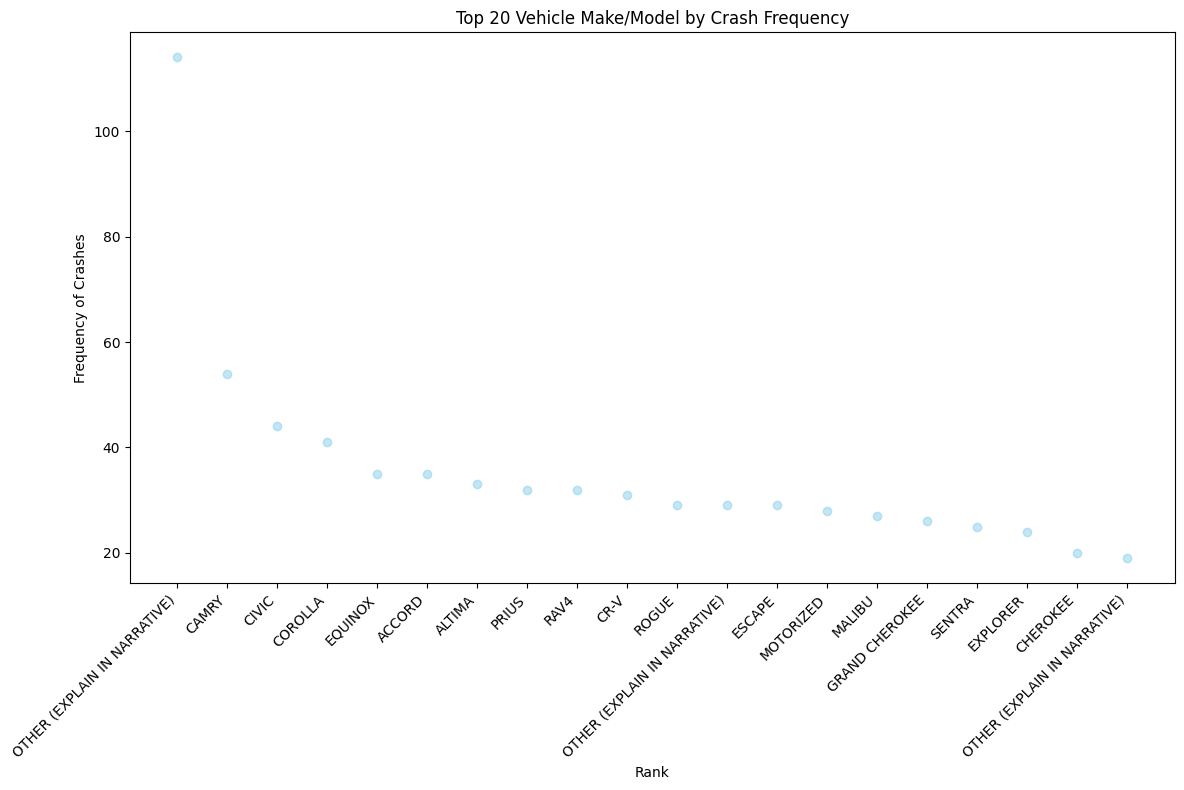

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'working_vehicles' DataFrame is defined and processed as before

# Aggregating data to find the frequency of crashes by make/model combination
crash_frequency = working_vehicles.groupby(['make', 'model']).size().reset_index(name='frequency')

# Sorting by frequency to get the top 20 most frequent make/model combinations
top_crashes = crash_frequency.sort_values(by='frequency', ascending=False).head(20)

# Generating an arbitrary index for x-axis since scatter plots require x and y values
top_crashes['index'] = range(1, len(top_crashes) + 1)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(top_crashes['index'], top_crashes['frequency'], alpha=0.5, color='skyblue')  # Adjust alpha for transparency
plt.xlabel('Rank')
plt.ylabel('Frequency of Crashes')
plt.title('Top 20 Vehicle Make/Model by Crash Frequency')
plt.xticks(top_crashes['index'], top_crashes['model'], rotation=45, ha='right')  # Custom ticks for model names
plt.tight_layout()
plt.show()

**Milestone 4**


---

[CTA - Ridership - 'L' Station Entries - Daily Totals](https://data.cityofchicago.org/resource/5neh-572f.json?$query=SELECT%20station_id%2C%20stationname%2C%20date%2C%20daytype%2C%20rides%20ORDER%20BY%20date%20DESC%20SEARCH%20%22UIC-halsted%22)



1. Identify what data sets you'll use.
  * I will be using the CTA L ridership as an aproximation of conegestion in the city. (CTA - Ridership - 'L' Station Entries - Daily Totals)
2. Where and how can you obtain them.
  * This dataset is avaiable in the chicago data portal at this [link](https://data.cityofchicago.org/resource/5neh-572f.json?$query=SELECT%20station_id%2C%20stationname%2C%20date%2C%20daytype%2C%20rides%20ORDER%20BY%20date%20DESC%20SEARCH%20%22UIC-halsted%22)
3. How to merge them in your existing data model.
4. What correlations/combinations you expect to make.
5. Visualize correlations and combinations of your data
6. Narrate your findings

